# **Data Analysis in High Energy Physics: Exercise 1.5 $p$-values**

**Find the number of standard deviations corresponding to $p$-values of 10%, 5%, and 1% for a Gaussian distribution. Consider both one-sided and two-sided $p$-values.**

**Reminder:** The error function is defined as the symmetric integral over the range of the standard Gaussian,  
$\displaystyle \text{erf}(x) = \frac{1}{\sqrt{\pi}} \int\limits_{-x}^{x}e^{-t^2}\,dt = \frac{2}{\sqrt{\pi}} \int\limits_{0}^{x}e^{-t^2}\,dt\,,$  
and so the probability for Gaussian distributed data to lie within $y$ of the mean is  
$\displaystyle P(\mu - y \leq x \leq \mu + y) = \int\limits_{\mu - y}^{\mu + y} \frac{1}{\sqrt{2\pi} \sigma} e^{-(x-\mu)^2/2\sigma^2}\,dx = \frac{2}{\sqrt{\pi}} \int\limits_{0}^{y/\sqrt{2}\sigma} e^{-t^2}\,dt = \text{erf}\left(\frac{y}{\sqrt{2}\sigma}\right)\,.$

In [1]:
TCanvas c;
TF1 f1;
std::vector<double> pvalues = {0.10, 0.05, 0.01};
double mu, sigma;

## Two-tailed $p$-value

As for the two-tailed Gaussian,  
$\displaystyle p(x) = P(\left|X\right| \geq x) = 1-\text{erf}\left(\frac{x}{\sqrt{2}\sigma}\right) \equiv \text{erfc}\left(\frac{x}{\sqrt{2}\sigma}\right)$,  
it is seen that for $x=n \sigma$, then

$\displaystyle p(n \sigma) = P(\left|X\right| \geq n \sigma) = 1-\text{erf}\left(\frac{n}{\sqrt{2}}\right)$,

thus,

$\displaystyle \text{erf}\left(\frac{n}{\sqrt{2}}\right) = 1 - p(n \sigma)$.

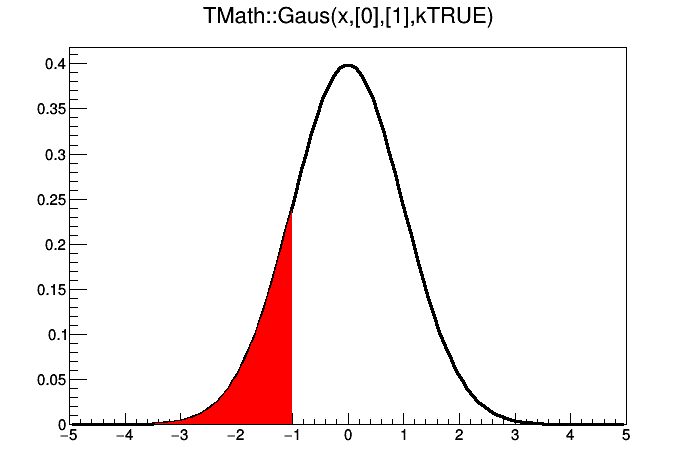

In [2]:
c.cd();
f1 = TF1("f1","TMath::Gaus(x,[0],[1],kTRUE)",-5,5);
mu = 0.;
sigma = 1.0;
f1.SetParameters(mu,sigma);
f1.SetLineColor(kBlack);
f1.Draw();

// THIS NEEDS TO BE EDITED AND TURNED INTO A FUNCTION
   const Int_t np = 100;
   //fill area below sub-range of the Gaussian
   Double_t x[np+3], y[np+3];
   Double_t xmin = -5; Double_t xmax = -1;
   Double_t dx = (xmax-xmin)/(np-1);
   for (Int_t i=0;i<np;i++) {
      x[i] = xmin + dx*i;
      y[i] = f1.Eval(x[i]);
   }
   x[np]   = x[np-1]; y[np]   = c.GetUymin();
   x[np+1] = x[0];    y[np+1] = y[np];
   x[np+2] = x[0];    y[np+2] = y[0];
   TGraph *gr = new TGraph(np+3,x,y);
   gr->SetFillColor(kRed);
   gr->Draw("LF");

c.cd();
c.Draw();

However, at this point we are at an impass analytically, as the integral of a Gaussian function over a finite range has no analytical solution, and must be evaluated numerically.  
  
So using erfc,

In [3]:
for(const double &p : pvalues){
    double n = TMath::Sqrt(2.)*TMath::ErfcInverse(p);
    std::cout << n << " standard deviations corresponds to a p-value of " << p << std::endl;
}

1.64485 standard deviations corresponds to a p-value of 0.1
1.95996 standard deviations corresponds to a p-value of 0.05
2.57583 standard deviations corresponds to a p-value of 0.01


and using erf,

In [4]:
for(const double &p : pvalues){
    double n = TMath::Sqrt(2.)*TMath::ErfInverse(1-p);
    std::cout << n << " standard deviations corresponds to a p-value of " << p << std::endl;
}

1.64485 standard deviations corresponds to a p-value of 0.1
1.95996 standard deviations corresponds to a p-value of 0.05
2.57583 standard deviations corresponds to a p-value of 0.01


the same output is found (as required by the defintion of the functions).

## One-tailed $p$-value

A one-sided *p*-value considers the probability for the data to have produced a value as extreme or grearer than the observed value on only one side of the distribution. For example, the *p*-value for the right tail of a Gaussian is $p(x) = \displaystyle P\left(X \geq x\right) = 1-\Phi(x)$, and the *p*-value for the left tail of a Gaussian is $p(-x) = \displaystyle P\left(X \leq -x\right) = \Phi(-x)$.  

It is seen by symmetry $p(x) = p(-x)$ and that for a normalized Gaussian a one-tailed *p*-vaule is 1/2 that of a two-tailed *p*-value.

\begin{split}
    p(x) = P\left(X \geq \left|x\right|\right)&= 1 - \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x} e^{-t^2/2}\,dt = 1 - \frac{1}{2}\left(1+\text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)\\
    &= 1-\Phi(x)\\
    &= \frac{1}{2}\left(1-\text{erf}\left(\frac{x}{\sqrt{2}}\right)\right) = \frac{1}{2}\text{erfc}\left(\frac{x}{\sqrt{2}}\right)
\end{split}

thus for $x = n \sigma$,

$\displaystyle \text{erf}\left(\frac{n\sigma}{\sqrt{2}}\right) = 1 - 2\,p(n \sigma)$.

In [5]:
sigma = 1.;

for(const double &p : pvalues){
    double n = (TMath::Sqrt(2.)/sigma)*TMath::ErfcInverse(2*p);
    std::cout << n << " standard deviations corresponds to a p-value of " << p << std::endl;
}

std::cout << std::endl;

for(const double &p : pvalues){
    double n = (TMath::Sqrt(2.)/sigma)*TMath::ErfInverse(1-2*p);
    std::cout << n << " standard deviations corresponds to a p-value of " << p << std::endl;
}

1.28155 standard deviations corresponds to a p-value of 0.1
1.64485 standard deviations corresponds to a p-value of 0.05
2.32635 standard deviations corresponds to a p-value of 0.01

1.28155 standard deviations corresponds to a p-value of 0.1
1.64485 standard deviations corresponds to a p-value of 0.05
2.32635 standard deviations corresponds to a p-value of 0.01


## Summary

In [6]:
cout << setfill('-') << setw(1) << "+" << setw(7) << "-" << setw(1) << "+" << setw(20) << "-" << setw(1) << "+" << setw(20) << "-" << setw(1) << "+" << endl;
std::cout << "p-value" << "\t  " << "n sigma two-tailed" << "\t" << "n sigma one-tailed" << std::endl;
cout << setfill('-') << setw(1) << "+" << setw(7) << "-" << setw(1) << "+" << setw(20) << "-" << setw(1) << "+" << setw(20) << "-" << setw(1) << "+" << endl;
for(const double &p : pvalues){
    std::cout << p << "\t\t" << TMath::Sqrt(2.)*TMath::ErfcInverse(p);
    std::cout << "\t\t " << (TMath::Sqrt(2.)/sigma)*TMath::ErfcInverse(2*p);
    std::cout << std::endl;
    cout << setfill('-') << setw(1) << "+" << setw(7) << "-" << setw(1) << "+" << setw(20) << "-" << setw(1) << "+" << setw(20) << "-" << setw(1) << "+" << endl;
}

+-------+--------------------+--------------------+
p-value	  n sigma two-tailed	n sigma one-tailed
+-------+--------------------+--------------------+
0.1		1.64485		 1.28155
+-------+--------------------+--------------------+
0.05		1.95996		 1.64485
+-------+--------------------+--------------------+
0.01		2.57583		 2.32635
+-------+--------------------+--------------------+


### Sanity Check

In [7]:
std::vector<double> checkvalues = {0.317310507863, 0.045500263896, 0.002699796063, 0.000063342484, 0.000000573303};

In [8]:
for(const double &p : checkvalues){
    double n = TMath::Sqrt(2.)*TMath::ErfcInverse(p);
    std::cout << n << " standard deviations corresponds to a p-value of " << p << std::endl;
}

1 standard deviations corresponds to a p-value of 0.317311
2 standard deviations corresponds to a p-value of 0.0455003
3 standard deviations corresponds to a p-value of 0.0026998
4 standard deviations corresponds to a p-value of 6.33425e-05
5 standard deviations corresponds to a p-value of 5.73303e-07


$\checkmark$

## References

1.) FAQ: What are the differences between one-tailed and two-tailed tests?  
UCLA: Institute for Digital Research and Education.  
from http://www.ats.ucla.edu/stat/mult_pkg/faq/general/tail_tests.htm